### ImageNet
1) Imagenet is an image database that organizes a competition for image classfication. <br>
2) Imagenet provides the CNN model weight and based on those weights custom pretrained models are developed<br>
3) Using custom pre-trained models in CNN is referred to as using Transfer Learning Techniques<br>
4) VGG16, VGG19, ResNet,ResNet50, MobileNet, Inception etc. are exmaples of Transer learning Techniques
These are custom CNN architectures used to implement image clasification

### VGG16
1) It uses Convolution with (3,3) filters with a stride of 1 and uses the 'same' padding with 
maxpool layer throughout the architecture<br>
2) In the end it has three fully connected layers followed by a softmax activation for output<br>

#### VGG16 Architecture
<img src="vgg16_arch.jpeg">

#### Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

#### Data Augmentation Visualization

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

### Fruit Image Classification using VGG16 and Data Augmentation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import random

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.mobilenet import preprocess_input

In [5]:
img_shape = (300,300)
BATCH_SIZE = 16

In [6]:
# E:\Img_datasets\Intel_Image\seg_train
train_dir = "E:\\Img_datasets\\Intel_Image\\seg_train"
test_dir = "E:\\Img_datasets\\Intel_Image\\seg_test"

### Data Augmentation

In [8]:
total = 2191 + 2271 + 2404 + 2512 + 2274 + 2382
print(total)
print(total*0.01)

14034
140.34


In [17]:
train_gen = ImageDataGenerator(
            rotation_range=20,horizontal_flip=True,vertical_flip=True,
            width_shift_range=0.2,height_shift_range=0.2,
            preprocessing_function=preprocess_input,
            zoom_range=0.2,shear_range=0.3,validation_split=0.99)


train = train_gen.flow_from_directory(train_dir,target_size=img_shape,shuffle=True,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='training')

Found 143 images belonging to 6 classes.


In [18]:
total_test = 437 + 474 + 553 + 525 + 510 + 501
print(total_test)

3000


In [19]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.01)

test = test_gen.flow_from_directory(test_dir,target_size=img_shape,shuffle=False,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='validation')

Found 28 images belonging to 6 classes.


In [22]:
train_samples = train.samples
test_samples = test.samples
print(train_samples)
print(test_samples)

143
28


In [25]:
classes = list(train.class_indices.keys())
print(train.class_indices)  # dict
print('Classes',classes)
num_classes = len(classes)
print(num_classes)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


In [27]:
print(train.class_indices.values())

dict_values([0, 1, 2, 3, 4, 5])


In [28]:
print(train.labels)
print(len(train.labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
143


In [29]:
print(test.labels)
print(len(test.labels))

[0 0 0 0 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
28


#### Displaying augmented images

TypeError: Invalid shape (16, 300, 300, 3) for image data

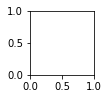

In [31]:
# it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

### Build The VGG16 Model

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

#### Import Saved weights from Imagenet for VGG16 model

In [35]:
vgg16m = VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
vgg16m.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [36]:
m1 = Sequential()
vgg16m.trainable = False
m1.add(vgg16m)
m1.add(GlobalAveragePooling2D())
m1.add(Dense(512,activation='relu'))
m1.add(BatchNormalization())
m1.add(Dropout(0.2))
m1.add(Dense(6,activation='softmax'))   # output layer

m1.compile(optimizer=Adam(beta_1=0.9),loss='categorical_crossentropy',
           metrics=['accuracy'])

In [37]:
# Train = 143, Test = 28
h1 = m1.fit(train,validation_data=test,epochs=4)
# epochs = no of iterations

Epoch 1/4
9/9 [==============================] - 798s 88s/step - loss: 1.7217 - accuracy: 0.4406 - val_loss: 1.2176 - val_accuracy: 0.6429
Epoch 2/4
9/9 [==============================] - 398s 44s/step - loss: 0.5726 - accuracy: 0.8182 - val_loss: 1.4019 - val_accuracy: 0.7143
Epoch 3/4
1/9 [==>...........................] - ETA: 4:21 - loss: 0.2625 - accuracy: 0.8667

KeyboardInterrupt: 

In [30]:
r1 = pd.DataFrame(h1.history)
r1['Epcohs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epcohs
0,1.768689,0.426573,1.383743,0.678571,0
1,0.565391,0.797203,1.557444,0.750000,1
2,0.343722,0.853147,1.200942,0.750000,2
3,0.279336,0.895105,1.229504,0.785714,3


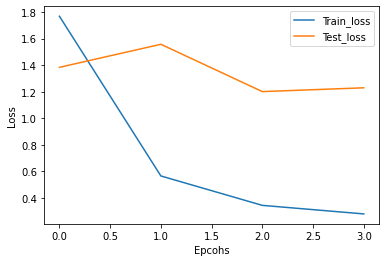

In [31]:
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

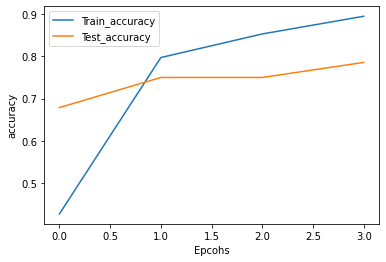

In [32]:
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
ypred = m1.predict(test)
print(ypred)

[[9.94932950e-01 8.18685231e-10 4.14452543e-08 1.79599859e-11
  1.44096106e-07 5.06687490e-03]
 [9.84069169e-01 7.50128095e-07 2.25138685e-09 1.51109944e-10
  3.72735428e-07 1.59297083e-02]
 [9.99995470e-01 4.63255961e-10 1.30475947e-12 3.44367791e-13
  2.68963133e-11 4.47910406e-06]
 [9.98491526e-01 1.32442448e-08 2.61985722e-09 3.59235454e-11
  3.86043109e-09 1.50842720e-03]
 [5.45810544e-05 9.98596013e-01 2.87722905e-05 8.08973447e-04
  3.39780760e-04 1.71876760e-04]
 [8.72019609e-06 9.99854207e-01 6.48453442e-06 5.98460133e-07
  1.08672702e-05 1.19102944e-04]
 [5.58932894e-04 9.96565282e-01 1.02872864e-05 6.24475506e-05
  2.64660630e-04 2.53840466e-03]
 [8.17935856e-04 9.97897267e-01 1.37986735e-05 3.30933399e-05
  8.07352990e-05 1.15717540e-03]
 [5.08681160e-06 6.07135632e-07 7.15532899e-01 1.34338203e-04
  2.82870442e-01 1.45660539e-03]
 [2.86545182e-05 2.07255271e-05 9.79232967e-01 2.03357544e-02
  2.98932835e-04 8.30087447e-05]
 [1.99240913e-09 1.82985946e-08 9.99857783e-01 7.7

In [34]:
ypred = [np.argmax(i) for i in ypred]
print(ypred)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 2, 0, 4, 4, 5, 0, 5, 5, 5]


In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
cm = confusion_matrix(test.labels,ypred)
print(cm)
print(classification_report(test.labels,ypred))

[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 1 4 0 0]
 [1 0 1 0 3 0]
 [1 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00         4
           2       0.60      0.60      0.60         5
           3       0.67      0.80      0.73         5
           4       1.00      0.60      0.75         5
           5       1.00      0.80      0.89         5

    accuracy                           0.79        28
   macro avg       0.82      0.80      0.79        28
weighted avg       0.82      0.79      0.79        28



### MobileNet

<img src="mobilenet_arch.png">

### Major Project
Implement the Intel Image project using MobileNet Transfer learning technique

Link Used -> https://www.tensorflow.org/api_docs/python/tf/keras/applications/

Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

### Mount Drive on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df  = pd.read_csv('/content/drive/My Drive/Colab_files/house_price2.csv')
df.head()